# Pymaceuticals Inc.
---

### Analysis

Analysis Observations:

1. The highest number of mice in the study are treated using Capomulin. while the lowest number of mice in the study are treated using Propriva.
2. The Drug Ramicane shows the greatest reduction of tumor volume based on mean and final tumor volume.
3. In reference to the box plot across four regimens of interest & summary statistics table, the final tumor volume treated by Capomulin and Ramicane trended lower than the others. Ramicane demonstrated lower final tumor volume, however it was used with a lower treatment than that of Capomulin. Fair results require equal treatments and variables.
4. Capolmulin was used to treat Mouse ID l509 and the tumor volume seems to decrease with time. Sampling also charts that five mice treated with the same regimen supports the assumption that Capomulin could reduce the size of tumor volume.
5. The correlation between Capomulin with average weight and final tumor volume, the value is 0.84, meaning that there is a strong positive correlation between the two variables. The r-squared value of 0.71 indicates that the final tumor volume could be predicted by using the average weight of a mouse.
The Drug Ramicane shows the greatest reduction of tumor volume based on mean and final tumor volume.
6. There is a strong and statistically significant positive correlation between mouse weight and average tumor volume for mice treated with Capomulin.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import os
import numpy as np
from scipy.stats import linregress
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data_df = pd.merge(mouse_metadata , study_results ,on = "Mouse ID")

# Display the data table for preview
merged_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
count_0f_mice=merged_data_df["Mouse ID"].value_counts()

len(count_0f_mice)



249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

duplicate_ID= merged_data_df.loc[merged_data_df.duplicated(subset=['Mouse ID','Timepoint',]),'Mouse ID'].unique() 
duplicate_ID


array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID.
duplicates_ID_df= merged_data_df.loc[merged_data_df["Mouse ID"] == "g989", :] 

duplicates_ID_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df =merged_data_df[merged_data_df['Mouse ID'].isin(duplicate_ID) == False]
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
unique_mice_count = len(clean_df['Mouse ID'].unique())
unique_mice_count

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
summary_stat_mean = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
summary_stat_median = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
summary_stat_variance = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
summary_stat_sd = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
summary_stat_sem = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
summary_stat_df=pd.DataFrame({"Mean":summary_stat_mean,"Median":summary_stat_median,"Variance":summary_stat_variance,"Standard Deviation":summary_stat_sd ,"Sem":summary_stat_sem})
summary_stat_df

,Mean,Median,Variance,Standard Deviation,Sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stat_agg=clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean","median","var","std","sem"])
summary_stat_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<function matplotlib.pyplot.show(close=None, block=None)>

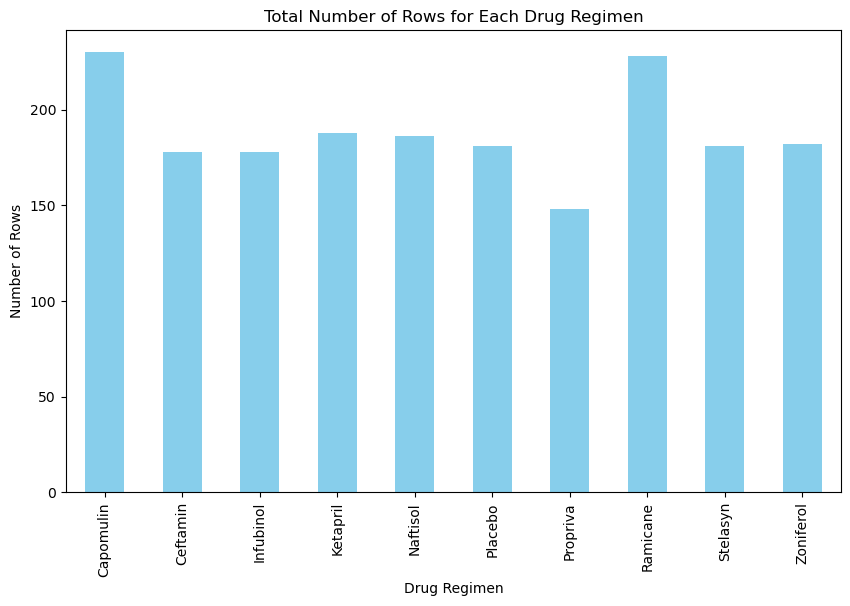

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_regime_counts=clean_df.groupby("Drug Regimen").count()["Mouse ID"]
drug_regime_counts.plot(kind="bar",figsize=(10,6),color="skyblue")
plt.title("Total Number of Rows for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Rows")
plt.show

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.


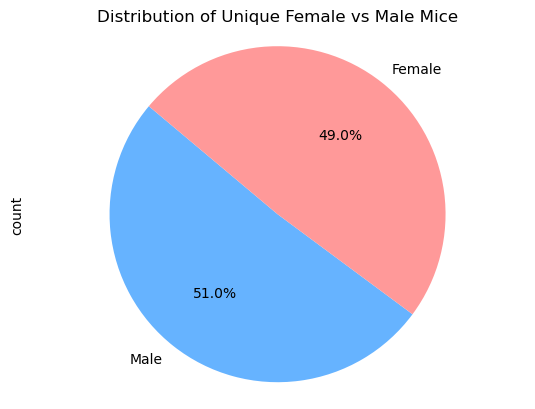

In [11]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
# Make the pie chart
sex_counts=clean_df["Sex"].value_counts()
sex_counts.plot(kind="pie",autopct="%1.1f%%",startangle=140,colors=["#66b3ff","#ff9999"])
plt.title("Distribution of Unique Female vs Male Mice")
plt.axis("equal")
plt.show()


## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

final_tumor_vol = clean_df.groupby(['Drug Regimen', 'Mouse ID']).last()[['Timepoint', 'Tumor Volume (mm3)']]
final_tumor_df = final_tumor_vol.reset_index()
print(final_tumor_vol)



                       Timepoint  Tumor Volume (mm3)
Drug Regimen Mouse ID                               
Capomulin    b128             45           38.982878
             b742             45           38.939633
             f966             20           30.485985
             g288             45           37.074024
             g316             45           40.159220
...                          ...                 ...
Zoniferol    q633             45           70.827796
             s337             45           62.109651
             w140              5           47.717952
             w575             45           68.401286
             x613             15           48.077646

[248 rows x 2 columns]


In [13]:
# Put treatments into a list for for loop (and later for plot labels)
regimen = ["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
final_tumor_vol_list =[]

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in regimen:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol =  final_tumor_df.loc[final_tumor_df["Drug Regimen"] == drug, "Tumor Volume (mm3)"]

    # add subset
    final_tumor_vol_list.append(final_tumor_vol)
    quartiles = final_tumor_vol.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    mean = final_tumor_vol.mean()
    iqr = upperq-lowerq
    lower_bound = lowerq -(1.5*iqr)
    upper_bound = upperq +(1.5*iqr)
    # Determine outliers using upper and lower bounds
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound)
    | (final_tumor_vol >upper_bound)]
    # Print out the result
    print(f"{drug} Regimen")
    print(f"Final tumor volume(mm3) for {drug} below {round(lower_bound,2)} could be outliers.")
    print(f"Final tumor volume(mm3) for {drug} above {round(upper_bound,2)} could be outliers.")
    print(f"Average tumor volume(mm3) for {drug} is: {round(mean,2)}")
    print(f"Number of outliers for Capomulin is: {outliers.count()}")
    if outliers.count() > 0:
        for i in outliers.index:
            print(f'Outlier final tumor volume(mm3) is {round(outliers[i], 2)}')
    print('----------------------------------------------------------')


Capomulin Regimen
Final tumor volume(mm3) for Capomulin below 20.7 could be outliers.
Final tumor volume(mm3) for Capomulin above 51.83 could be outliers.
Average tumor volume(mm3) for Capomulin is: 36.67
Number of outliers for Capomulin is: 0
----------------------------------------------------------
Ramicane Regimen
Final tumor volume(mm3) for Ramicane below 17.91 could be outliers.
Final tumor volume(mm3) for Ramicane above 54.31 could be outliers.
Average tumor volume(mm3) for Ramicane is: 36.19
Number of outliers for Capomulin is: 0
----------------------------------------------------------
Infubinol Regimen
Final tumor volume(mm3) for Infubinol below 36.83 could be outliers.
Final tumor volume(mm3) for Infubinol above 82.74 could be outliers.
Average tumor volume(mm3) for Infubinol is: 58.18
Number of outliers for Capomulin is: 1
Outlier final tumor volume(mm3) is 36.32
----------------------------------------------------------
Ceftamin Regimen
Final tumor volume(mm3) for Ceftami

C:\Users\nebia\AppData\Local\Temp\ipykernel_21356\1339626181.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  final_tumor_plot.boxplot(final_tumor_vol_list, labels=regimen, flierprops={'markerfacecolor':'r','markersize': 10})


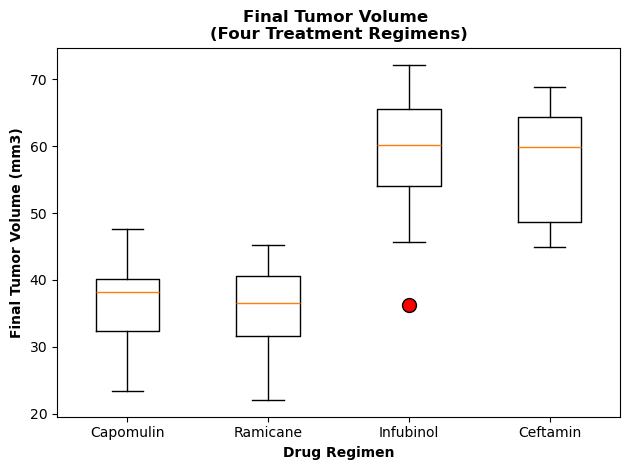

In [14]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
fig1, final_tumor_plot = plt.subplots()
final_tumor_plot.boxplot(final_tumor_vol_list, labels=regimen, flierprops={'markerfacecolor':'r','markersize': 10})

# Set x/y label, title
final_tumor_plot.set_title('Final Tumor Volume \n(Four Treatment Regimens)', fontweight='bold')
final_tumor_plot.set_xlabel('Drug Regimen', fontweight='bold')
final_tumor_plot.set_ylabel('Final Tumor Volume (mm3)', fontweight='bold')

# Save box plot graph to Images folder
output_directory="images"
output_path = os.path.join(output_directory, 'final_tumor_boxplot.png')
os.makedirs(output_directory,exist_ok=True)
plt.tight_layout()
plt.savefig(output_path)

# Present the box plot chart
plt.show()

# To close pyplot
#plt.close()

## Line and Scatter Plots

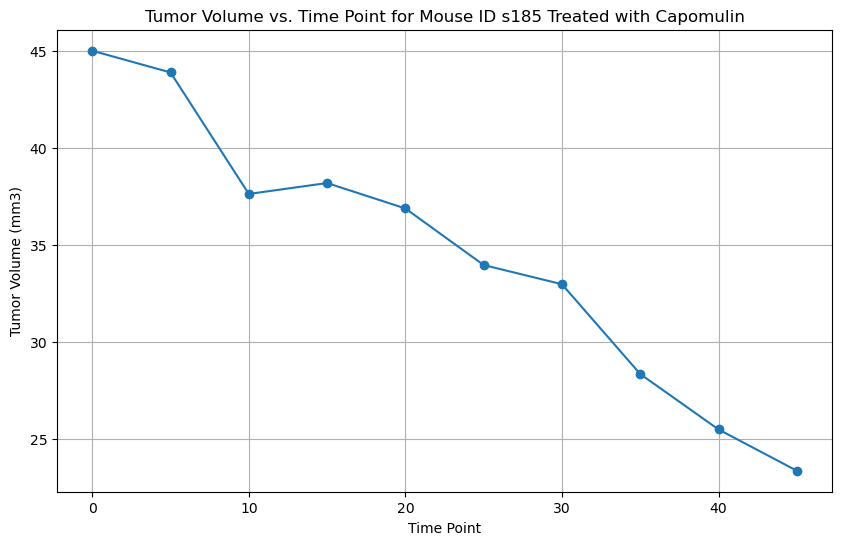

In [15]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Filter the data for mice treated with Capomulin
capomulin_data = clean_df[clean_df['Drug Regimen'] == 'Capomulin']

# Select a single mouse treated with Capomulin
mouse_id = capomulin_data['Mouse ID'].unique()[0]
single_mouse_data = capomulin_data[capomulin_data['Mouse ID'] == mouse_id]

# Generate the line plot
plt.figure(figsize=(10, 6))
plt.plot(single_mouse_data['Timepoint'], single_mouse_data['Tumor Volume (mm3)'], marker='o')

# Set title and labels
plt.title(f'Tumor Volume vs. Time Point for Mouse ID {mouse_id} Treated with Capomulin')
plt.xlabel('Time Point')
plt.ylabel('Tumor Volume (mm3)')

# Show plot
plt.grid(True)
plt.show()

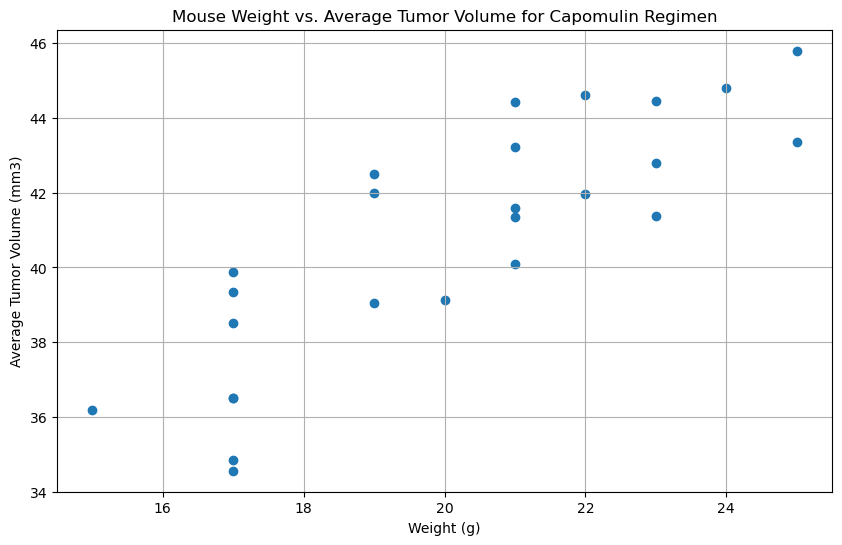

In [16]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Filter the data for mice treated with Capomulin
capomulin_data = clean_df[clean_df['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse
avg_tumor_vol = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()

# Merge with the original dataset to get the mouse weights
merged_data = pd.merge(avg_tumor_vol, capomulin_data[['Mouse ID', 'Weight (g)']].drop_duplicates(), on='Mouse ID')

# Generate the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'], marker='o')

# Set title and labels
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Show plot
plt.grid(True)
plt.show()

## Correlation and Regression

Correlation coefficient: 0.84


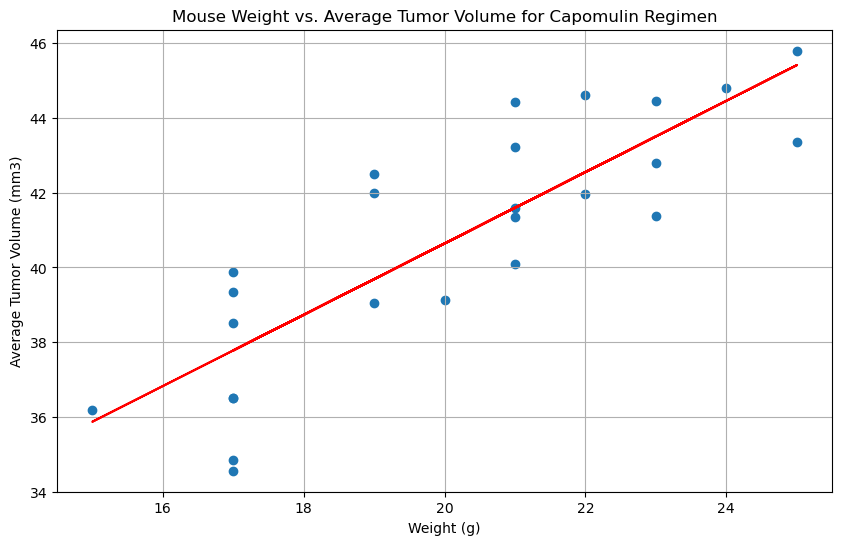

Slope: 0.95
Intercept: 21.55
R-squared: 0.71
P-value: 1.32e-07
Standard Error: 0.13


In [17]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
capomulin_data = clean_df[clean_df['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse
avg_tumor_vol = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()

# Merge with the original dataset to get the mouse weights
merged_data = pd.merge(avg_tumor_vol, capomulin_data[['Mouse ID', 'Weight (g)']].drop_duplicates(), on='Mouse ID')

# Calculate the correlation coefficient
correlation = np.corrcoef(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'])[0, 1]
print(f'Correlation coefficient: {correlation:.2f}')

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'])

# Generate the scatter plot with the regression line
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'], marker='o')
plt.plot(merged_data['Weight (g)'], intercept + slope * merged_data['Weight (g)'], color='r')

# Set title and labels
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Show plot
plt.grid(True)
plt.show()

# Print the linear regression results
print(f'Slope: {slope:.2f}')
print(f'Intercept: {intercept:.2f}')
print(f'R-squared: {r_value**2:.2f}')
print(f'P-value: {p_value:.2e}')
print(f'Standard Error: {std_err:.2f}')